<a href="https://colab.research.google.com/github/Seomzo/Project_1-Money_Printer/blob/initial-data-modelling/crypto_price_predictor_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!pip install yfinance
!pip install prophet

python(64930) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(64931) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

import yfinance as yf

%matplotlib inline


In [95]:
from datetime import datetime

start_date='2017-01-01'
today_date = datetime.today().strftime('%Y-%m-%d')

print(f"Today's date in YYYY-MM-DD format: {today_date}")

Today's date in YYYY-MM-DD format: 2024-11-19


In [96]:
# In this section, we will implement a function that prompts the user to enter a date in the `YYYY-MM-DD` format. 
# The function will validate the input and ensure that it is correctly formatted.

# If the user enters an invalid date format, they will be given up to three attempts to enter a valid date. 
# If they fail to provide a valid date after three attempts, the program will default to the date `2024-01-01`.

# The function will then calculate the number of days from the entered (or defaulted) date to today's date.

# Declare slice_date as a global variable
slice_date = ''

# Function to validate date format and calculate period value
def get_period_value():
    global slice_date  # Use the global variable
    attempts = 0
    max_attempts = 3

    while attempts < max_attempts:
        # Ask user for slice date
        slice_date = input(f"To slice the data to compare real values versus prediction model, please enter a date in YYYY-MM-DD format after {start_date} but before {today_date}: ")

        # Validate the date format
        try:
            # Attempt to parse the date
            parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')
            break  # Exit the loop if the date is valid
        except ValueError:
            attempts += 1
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")
            if attempts == max_attempts:
                print("Maximum attempts reached. Defaulting to 2024-01-01.")
                slice_date = '2024-01-01'
                parsed_date = datetime.strptime(slice_date, '%Y-%m-%d')

    # Calculate the number of days from the slice date to today
    today = datetime.today()
    period_value = (today - parsed_date).days

    return period_value

In [ ]:
crypto_symbol = 'BTC-USD'
crypto_symbol = input("Enter crypto symbol like (BTC-USD): ").upper()
print(f"Crypto Symbol: {crypto_symbol}")

Crypto Symbol: BTC-USD


In [98]:
period_value = get_period_value()
if period_value is not None:
    print(f"Number of days from {slice_date} to today: {period_value}")

Number of days from 2024-10-10 to today: 40


In [99]:
# Fetch historical data for Bitcoin and Ethereum
btc = yf.download(crypto_symbol, start=start_date, end=today_date)
# eth = yf.download('ETH-USD', start='2015-01-01', end='2023-01-01')

# Display the first few rows of each dataset to inspect the data
print("Bitcoin data:")
display(btc.head())
display(btc.tail())

# print("\nEthereum data:")
# print(eth.head())


[*********************100%***********************]  1 of 1 completed

Bitcoin data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2017-01-01 00:00:00+00:00,998.325012,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02 00:00:00+00:00,1021.750000,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03 00:00:00+00:00,1043.839966,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04 00:00:00+00:00,1154.729980,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05 00:00:00+00:00,1013.380005,1013.380005,1191.099976,910.416992,1156.729980,510199008


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2024-11-14 00:00:00+00:00,87250.429688,87250.429688,91765.218750,86682.812500,90574.882812,87616705248
2024-11-15 00:00:00+00:00,91066.007812,91066.007812,91868.742188,87124.898438,87284.179688,78243109518
2024-11-16 00:00:00+00:00,90558.476562,90558.476562,91763.945312,90094.226562,91064.367188,44333192814
2024-11-17 00:00:00+00:00,89845.851562,89845.851562,91433.039062,88741.664062,90558.460938,46350159305
2024-11-18 00:00:00+00:00,90542.640625,90542.640625,92596.789062,89393.593750,89843.718750,75535775084


In [100]:
# The code removes any rows with missing values from the DataFrame and then 
# selects the 'Close' prices up to a specified date (slice_date). 

btc.dropna(inplace=True)
crypto_data = btc.loc[:slice_date, 'Close']
display(crypto_data.head())
display(crypto_data.tail())


Ticker,BTC-USD
Date,
2017-01-01 00:00:00+00:00,998.325012
2017-01-02 00:00:00+00:00,1021.750000
2017-01-03 00:00:00+00:00,1043.839966
2017-01-04 00:00:00+00:00,1154.729980
2017-01-05 00:00:00+00:00,1013.380005


Ticker,BTC-USD
Date,
2024-10-06 00:00:00+00:00,62818.953125
2024-10-07 00:00:00+00:00,62236.660156
2024-10-08 00:00:00+00:00,62131.968750
2024-10-09 00:00:00+00:00,60582.101562
2024-10-10 00:00:00+00:00,60274.500000


<Axes: xlabel='Date'>

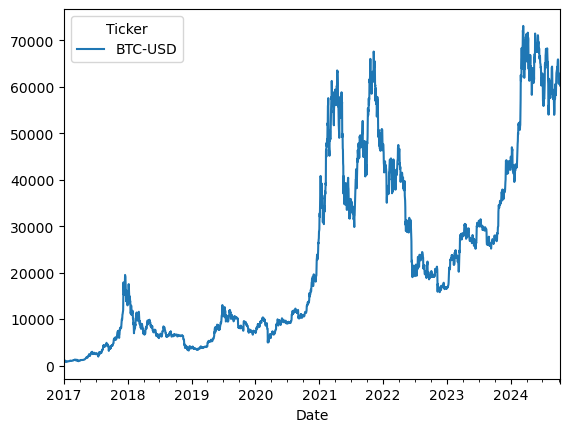

In [101]:
# A line plot of the Bitcoin closing prices from the start date (2017) up to 
# the specified slice_date. This visualization allows for an easy analysis of 
# the price trends and movements of Bitcoin over the selected time period.

crypto_data.plot()

In [102]:
crypto_data = crypto_data.reset_index()
crypto_df = crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})
display(crypto_data.head())
display(crypto_data.tail())

Ticker,Date,BTC-USD
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,Date,BTC-USD
2835,2024-10-06 00:00:00+00:00,62818.953125
2836,2024-10-07 00:00:00+00:00,62236.660156
2837,2024-10-08 00:00:00+00:00,62131.968750
2838,2024-10-09 00:00:00+00:00,60582.101562
2839,2024-10-10 00:00:00+00:00,60274.500000


In [103]:
display(crypto_df.head())
display(crypto_df.tail())

Ticker,ds,y
0,2017-01-01 00:00:00+00:00,998.325012
1,2017-01-02 00:00:00+00:00,1021.750000
2,2017-01-03 00:00:00+00:00,1043.839966
3,2017-01-04 00:00:00+00:00,1154.729980
4,2017-01-05 00:00:00+00:00,1013.380005


Ticker,ds,y
2835,2024-10-06 00:00:00+00:00,62818.953125
2836,2024-10-07 00:00:00+00:00,62236.660156
2837,2024-10-08 00:00:00+00:00,62131.968750
2838,2024-10-09 00:00:00+00:00,60582.101562
2839,2024-10-10 00:00:00+00:00,60274.500000


In [104]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ds      2840 non-null   datetime64[ns, UTC]
 1   y       2840 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 44.5 KB


In [105]:
# The code initializes a Prophet model and fits it to the cryptocurrency data 
# after removing timezone information from the date column. It then creates a 
# future dataframe for predictions, forecasts future trends, and displays the 
# first five rows of the resulting forecast DataFrame

crypto_model = Prophet()
crypto_df['ds'] = crypto_df['ds'].dt.tz_localize(None)
crypto_model.fit(crypto_df)
future_trends = crypto_model.make_future_dataframe(periods=period_value, freq="D")
forecast_trends = crypto_model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

17:59:19 - cmdstanpy - INFO - Chain [1] start processing
python(64933) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
17:59:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-2752.229601,-7980.772697,3783.891971,-2752.229601,-2752.229601,590.969177,590.969177,590.969177,-1.950678,-1.950678,-1.950678,592.919855,592.919855,592.919855,0.0,0.0,0.0,-2161.260424
1,2017-01-02,-2716.740213,-8159.951034,4073.614062,-2716.740213,-2716.740213,726.246177,726.246177,726.246177,56.841135,56.841135,56.841135,669.405042,669.405042,669.405042,0.0,0.0,0.0,-1990.494036
2,2017-01-03,-2681.250824,-8213.190775,4069.249431,-2681.250824,-2681.250824,715.996200,715.996200,715.996200,-18.339529,-18.339529,-18.339529,734.335729,734.335729,734.335729,0.0,0.0,0.0,-1965.254624
3,2017-01-04,-2645.761435,-7845.123958,4566.638180,-2645.761435,-2645.761435,811.065506,811.065506,811.065506,24.855124,24.855124,24.855124,786.210382,786.210382,786.210382,0.0,0.0,0.0,-1834.695929
4,2017-01-05,-2610.272046,-7141.683197,4286.105944,-2610.272046,-2610.272046,783.340518,783.340518,783.340518,-40.424830,-40.424830,-40.424830,823.765348,823.765348,823.765348,0.0,0.0,0.0,-1826.931528


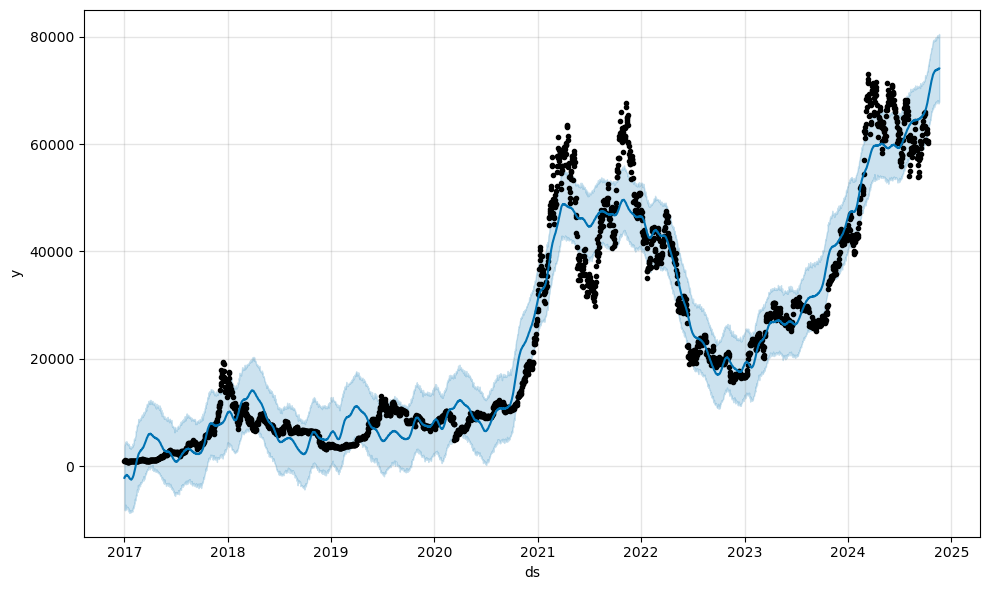

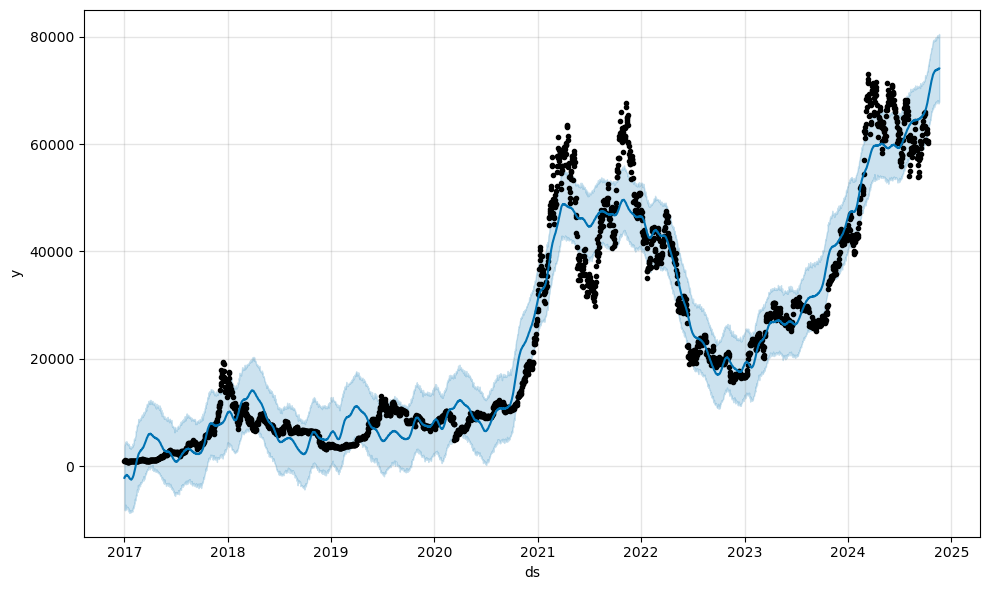

In [106]:
# This cell is responsible for plotting the forecast trends against actual values built from prophet model. 
# However it does not include the real data from slice date to current date. 
crypto_model.plot(forecast_trends)

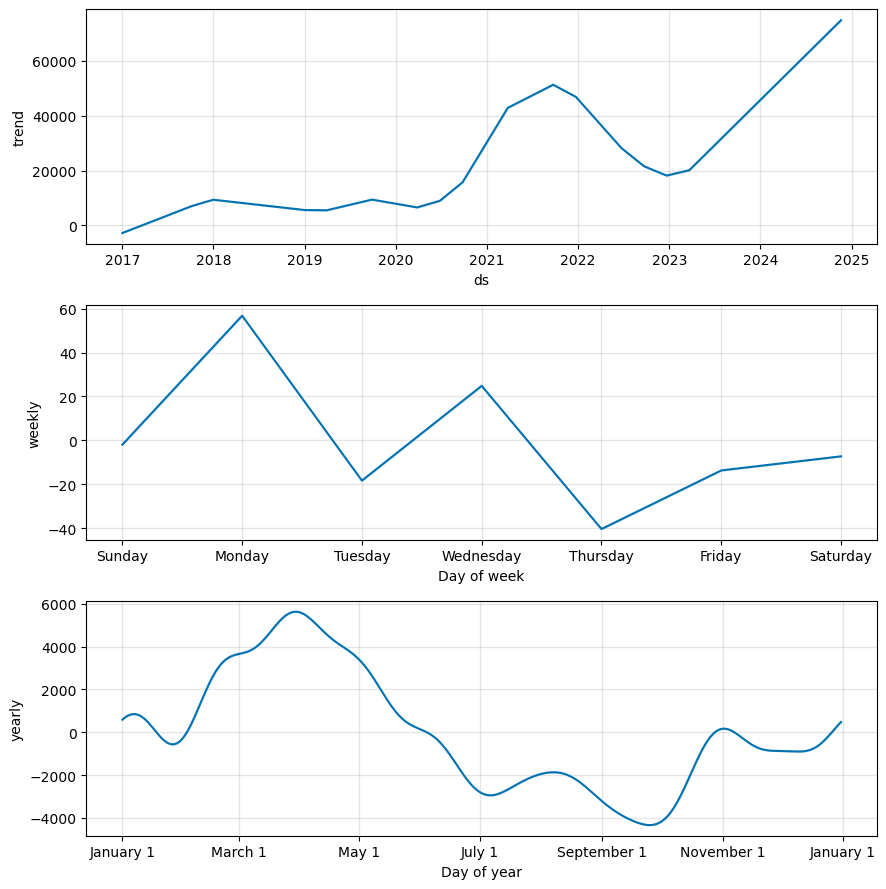

In [107]:
# Plotting the components of the model.
figures = crypto_model.plot_components(forecast_trends)

### Summary of Plots

1. **Trend**: Steady growth from 2017, dips in 2022, and sharp rise towards 2025.  
2. **Weekly Seasonality**: Peaks on Mondays, lowest on Thursdays, slight weekend recovery.  
3. **Yearly Seasonality**: Peaks in March, dips in July-August, recovers in autumn.  


In [108]:
forecast_trends= forecast_trends[['ds','yhat']]

In [109]:
forecast_trends.set_index('ds', inplace=True)


In [110]:
# reduce the slice_date by period value into another variable

reduced_date = pd.to_datetime(slice_date) - pd.DateOffset(days=period_value)

# compare reduced_date with start_date and see which one is later and keep that date in reduced_date
if reduced_date < pd.to_datetime(start_date):
    reduced_date = pd.to_datetime(start_date)

reduced_date_str = reduced_date.strftime('%Y-%m-%d')
print(f"Reduced Date: {reduced_date_str} and Slice Date: {slice_date}")



Reduced Date: 2024-08-31 and Slice Date: 2024-10-10


In [111]:
forecast_dataframe = forecast_trends.loc[reduced_date:].copy()   # Data from 2024-01-01 to now

# df_after_2024['Date'] = df_after_2024['Date'].dt.tz_localize(None)
# df_after_2024.set_index('Date', inplace=True)
display (forecast_dataframe.head())





,yhat
ds,
2024-08-31,64477.169477
2024-09-01,64493.870996
2024-09-02,64566.050378
2024-09-03,64506.556304
2024-09-04,64567.951946


In [112]:
real_values_for_compare_df = btc.loc[reduced_date_str:, 'Close'].copy()
# real_values_for_compare_df = real_values_for_compare_df.reset_index()
real_values_for_compare_df = real_values_for_compare_df.reset_index()
# real_2024.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)

real_values_for_compare_df['Date'] = real_values_for_compare_df['Date'].dt.tz_localize(None)

display(real_values_for_compare_df.head())

Ticker,Date,BTC-USD
0,2024-08-31,58969.898438
1,2024-09-01,57325.488281
2,2024-09-02,59112.480469
3,2024-09-03,57431.023438
4,2024-09-04,57971.539062


In [113]:
real_values_for_compare_df = real_values_for_compare_df.set_index('Date')


In [114]:
display(real_values_for_compare_df.head())
display(real_values_for_compare_df.tail())

Ticker,BTC-USD
Date,
2024-08-31,58969.898438
2024-09-01,57325.488281
2024-09-02,59112.480469
2024-09-03,57431.023438
2024-09-04,57971.539062


Ticker,BTC-USD
Date,
2024-11-14,87250.429688
2024-11-15,91066.007812
2024-11-16,90558.476562
2024-11-17,89845.851562
2024-11-18,90542.640625


In [115]:
# merge the 2 dataframes

merged_for_comparsion_df = real_values_for_compare_df.join(forecast_dataframe, how='inner')
display(merged_for_comparsion_df.head())
display(merged_for_comparsion_df.tail())


,BTC-USD,yhat
2024-08-31,58969.898438,64477.169477
2024-09-01,57325.488281,64493.870996
2024-09-02,59112.480469,64566.050378
2024-09-03,57431.023438,64506.556304
2024-09-04,57971.539062,64567.951946


,BTC-USD,yhat
2024-11-14,87250.429688,73872.173549
2024-11-15,91066.007812,73928.102392
2024-11-16,90558.476562,73968.537101
2024-11-17,89845.851562,74013.284135
2024-11-18,90542.640625,74117.284538


In [116]:
merged_for_comparsion_df.rename(columns={crypto_symbol:'Actual Price', 'yhat':'Predicted Price'}, inplace=True)
display(merged_for_comparsion_df)



,Actual Price,Predicted Price
2024-08-31,58969.898438,64477.169477
2024-09-01,57325.488281,64493.870996
2024-09-02,59112.480469,64566.050378
2024-09-03,57431.023438,64506.556304
2024-09-04,57971.539062,64567.951946
...,...,...
2024-11-14,87250.429688,73872.173549
2024-11-15,91066.007812,73928.102392
2024-11-16,90558.476562,73968.537101
2024-11-17,89845.851562,74013.284135


A line plot to compare the Prophet model's predictions against the actual values, with the model trained on data prior to the red vertical line (representing the slice_date). The area after the red line displays the model's forecasts, allowing for a visual assessment of how well the predictions align with the real values.


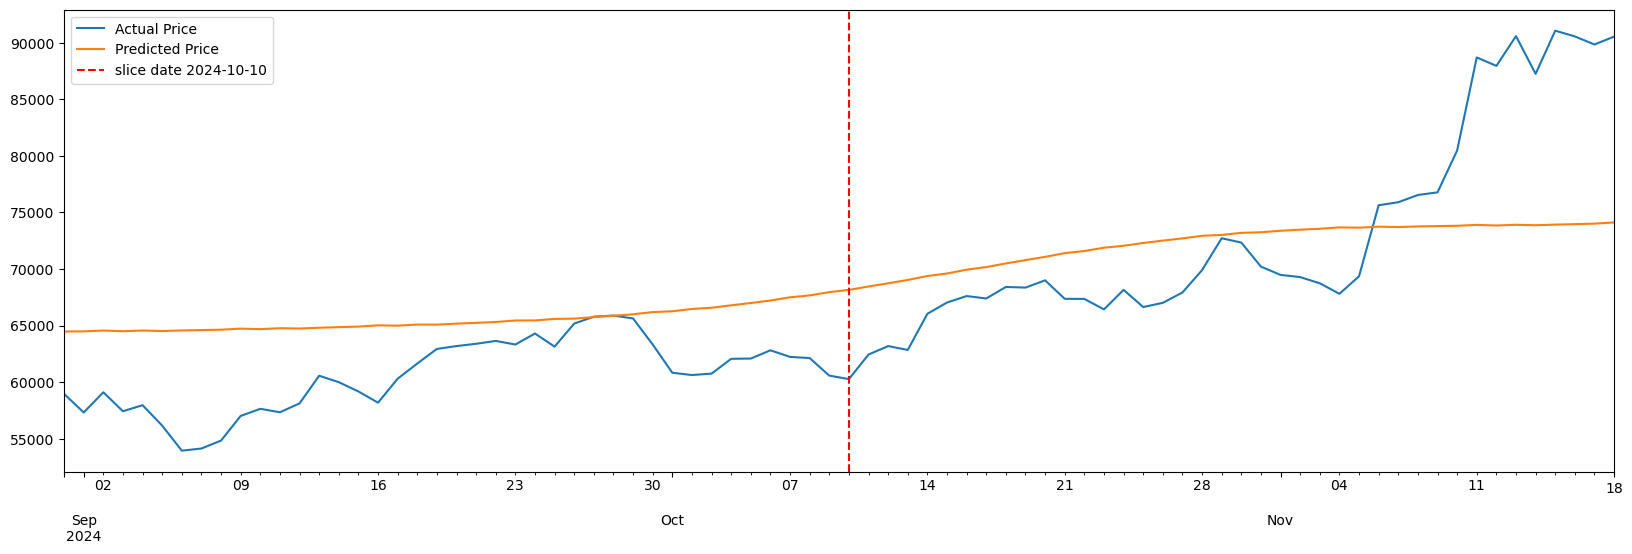

<Axes: >

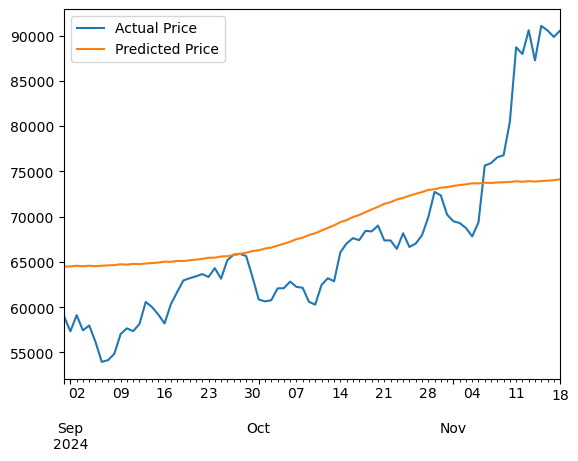

In [117]:


# The code generates a line plot to compare the Prophet model's predictions 
# against the actual values, with the model trained on data prior to the red 
# vertical line (representing the slice_date). The area after the red line 
# displays the model's forecasts, allowing for a visual assessment of how well 
# the predictions align with the real values.


fig, ax = plt.subplots(figsize=(20, 6))  # Change the width and height as needed
merged_for_comparsion_df.plot(ax=ax)
label_date = f"slice date {slice_date}"
plt.axvline(x=pd.to_datetime(slice_date), color='red', linestyle='--', label=label_date)

# Optionally, add a legend
plt.legend()

# Show the plot
plt.show()
merged_for_comparsion_df.plot()


# Now for the fun part... Buy or Sell ?

  - Determine Buy/Sell Signals: After making predictions, you need to establish criteria for when to buy or sell based on the forecasted prices. For example, you could decide to buy if the forecasted price is significantly higher than the last known price and sell if it is lower.

  - Create Buy/Sell Data: Create a new DataFrame that holds the dates and corresponding buy/sell signals.

  - Plot the Forecast and Indicators: Use Matplotlib to plot the forecast and overlay the buy/sell indicators on the graph.


In [118]:
full_crypto_data = btc.loc[:, 'Close'].copy()

full_crypto_data = full_crypto_data.reset_index()

full_crypto_data = full_crypto_data.rename(columns={'Date':'ds', crypto_symbol: 'y'})

full_crypto_data['ds'] = full_crypto_data['ds'].dt.tz_localize(None)

display(full_crypto_data.head())
display(full_crypto_data.tail())

Ticker,ds,y
0,2017-01-01,998.325012
1,2017-01-02,1021.750000
2,2017-01-03,1043.839966
3,2017-01-04,1154.729980
4,2017-01-05,1013.380005


Ticker,ds,y
2874,2024-11-14,87250.429688
2875,2024-11-15,91066.007812
2876,2024-11-16,90558.476562
2877,2024-11-17,89845.851562
2878,2024-11-18,90542.640625


In [119]:
model = Prophet()
model.fit(full_crypto_data)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


17:59:22 - cmdstanpy - INFO - Chain [1] start processing
python(64934) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
17:59:22 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
# Determine buy/sell signals
buy_signals = []
sell_signals = []
#last_price = full_crypto_data['y'].iloc[-1]
last_60_rows = forecast.iloc[-60:]

tomorrow_price = last_60_rows['yhat'].iloc[-30]
month_later_price = last_60_rows['yhat'].iloc[-1]
print(f"{tomorrow_price} -> {month_later_price}")

# prompt percentage change between tomorrow_price and month_later_price
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100
print(f"Percentage change: {percentage_change:.2f}%")


75693.34755610951 -> 77709.49362595602
Percentage change: 2.66%


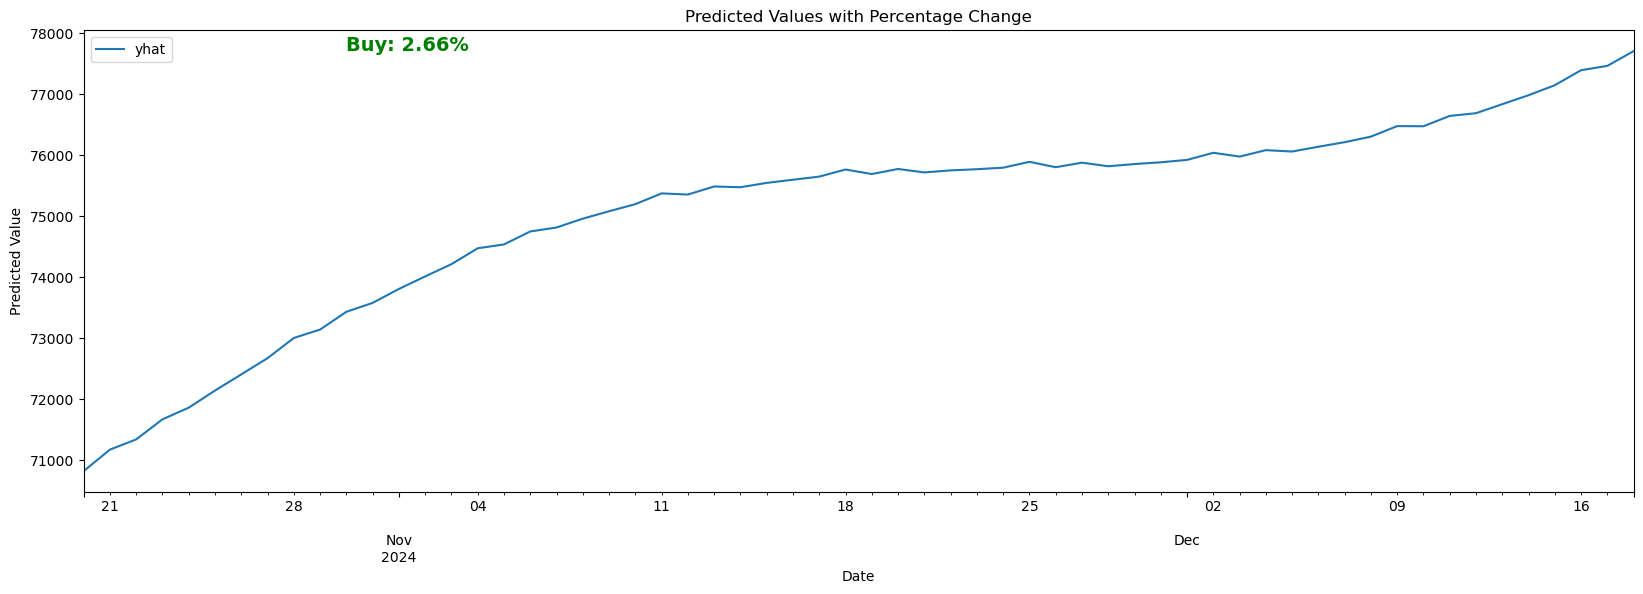

In [121]:
last_60_rows.plot(x='ds', y='yhat', figsize=(20, 6))

# Calculate the percentage change
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100

# Add the percentage change value to the plot
if(percentage_change > 0):
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Buy: {percentage_change:.2f}%',
         fontsize=14, fontweight='bold', color='green')
else:
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Sell: {percentage_change:.2f}%  ',
         fontsize=14, fontweight='bold', color='red')

plt.title('Predicted Values with Percentage Change')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.show()


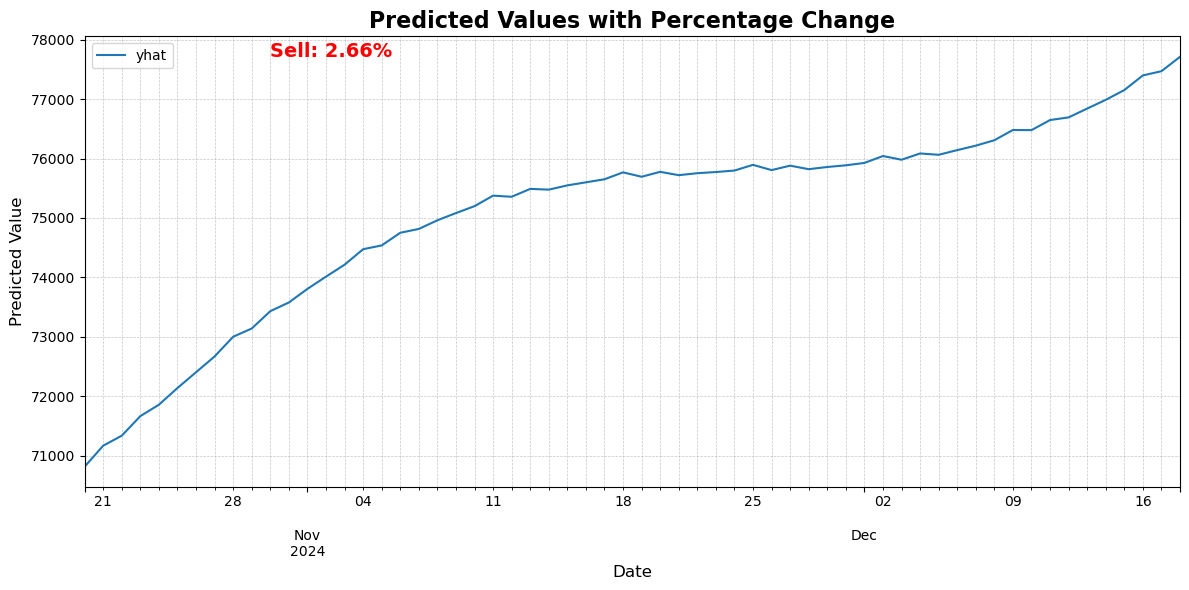

In [122]:
import matplotlib.dates as mdates

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))
last_60_rows.plot(x='ds', y='yhat', ax=ax)

# # Formatting the x-axis for better date readability
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show every week
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))  # Format as 'Month Day, Year'
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Calculate the percentage change
percentage_change = ((month_later_price - tomorrow_price) / tomorrow_price) * 100

# Add the prediction text
if(percentage_change < 0):
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Buy: {percentage_change:.2f}%',
         fontsize=14, fontweight='bold', color='green')
else:
    plt.text(last_60_rows['ds'].iloc[-50],
         last_60_rows['yhat'].iloc[-1] ,
         f'Sell: {percentage_change:.2f}%  ',
         fontsize=14, fontweight='bold', color='red')

# Add labels and title
plt.title('Predicted Values with Percentage Change', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Value', fontsize=12)

# Show grid for better visualization
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



### Executive Summary

This script generates a predictive line plot for forecasted values (`yhat`) over a 60-day period, offering actionable investment insights.

#### **Key Features**:
1. **Plot**:
   - Visualizes predicted values with clear date formatting and rotated labels.
   - Includes a bold prediction overlay:  
     - **Green "BUY"** for positive percentage change.  
     - **Red "SELL"** for negative percentage change.
   
2. **Logic**:
   - **Percentage change**: Calculated between tomorrow's value and the value a month later.  
   - Recommendation based on the trend:
     - Positive change → "BUY"  
     - Negative change → "SELL"


#### **Purpose**:
To provide clear, data-driven insights for short-term investment decisions.